### Meta estimator voting classifier voting=hard

In [21]:
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.datasets import make_classification

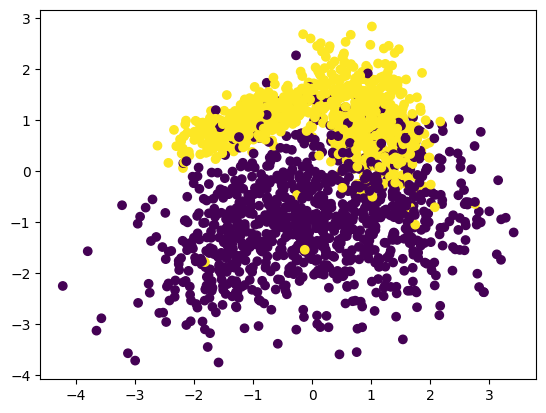

In [18]:
X,y = make_classification(n_samples=2000, n_features=2,n_redundant=0,random_state=21)
plt.scatter(x=X[:,0],y=X[:,1],c=y)

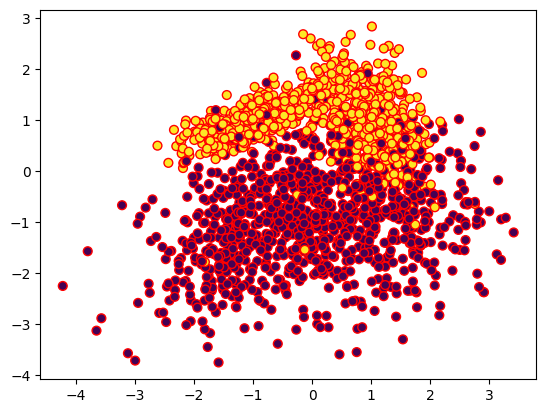

In [20]:
X,y = make_classification(n_samples=2000, n_features=2,n_redundant=0,random_state=21)
plt.scatter(x=X[:,0],y=X[:,1],c=y,s=40,edgecolors='red')

In [45]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier().fit(X,y)
clf3 = DecisionTreeClassifier().fit(X,y)
clf=VotingClassifier(
    estimators=[("LogisticRegression",clf1),
                ("KNeighborsClassifier",clf2),
                ("DecisionTreeClassifier",clf3)],
                 voting="hard"
)

In [46]:
clf1.predict(X)
clf1.score(X,y)

0.9065

In [47]:
clf3.predict(X)
clf3.score(X,y)

1.0

In [48]:
# voting btw clf1 ,clf2 ,clf3

clf4.fit(X,y)
clf4.predict(X)
clf4.score(X,y)

0.9435

### Meta estimator voting classifier soft (2/2)

In [66]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier().fit(X,y)
clf3=VotingClassifier(
    estimators=[("LogisticRegression",clf1),
                ("KNeighborsClassifier",clf2)],
                 voting="soft",
                 weights=[1,4]
)

In [67]:
clf2.predict(X)
clf2.score(X,y)

0.9325

In [68]:
clf3.fit(X,y)
clf3.predict(X)
clf3.score(X,y)

0.9325

In [69]:
clf1.predict_proba(X)

array([[9.99721215e-01, 2.78784917e-04],
       [7.80445522e-02, 9.21955448e-01],
       [1.02522010e-01, 8.97477990e-01],
       ...,
       [7.34821656e-02, 9.26517834e-01],
       [9.98169847e-01, 1.83015322e-03],
       [9.92663521e-01, 7.33647870e-03]])

In [74]:
def make_plots():
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    plt.scatter(X[:,0],X[:,1],c=y, s=5)
    plt.title("Original Data")
    plt.subplot(142)
    plt.scatter(X[:,0],X[:,1],c=clf1.predict_proba(X)[:,1],s=10)
    plt.title("Logistic Regression")
    plt.subplot(143)
    plt.scatter(X[:,0],X[:,1],c=clf2.predict_proba(X)[:,1],s=10)
    plt.title("KNN")
    plt.subplot(143)
    plt.scatter(X[:,0],X[:,1],c=clf3.predict_proba(X)[:,1],s=10)
    plt.title("Voting classifier")


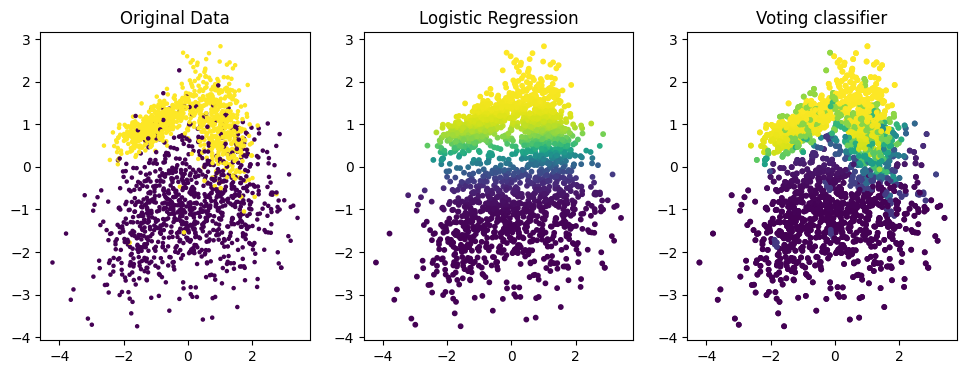

In [75]:
make_plots()